<a href="https://colab.research.google.com/github/Mr94t3z/pembelajaran-mesin/blob/master/Quiz_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

***Principal Component Analysis menggunakan representasi 2D dan 3D*** ⛹

---


In [1]:
import numpy as np 
import pandas as pd 

In [2]:
db = pd.read_csv('https://raw.githubusercontent.com/Mr94t3z/pembelajaran-mesin/master/datasets/data.csv')
db.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


*Mari kita lihat jenis variabelnya dan jika kita memiliki NAs:*

In [3]:
print(db.info())
print(db.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [4]:
db['label'].value_counts() #genre sama-sama terwakili

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

*Sekarang saya hanya akan menyimpan yang numerik:*

In [5]:
db1 = db.iloc[:,1:29]
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tempo               1000 non-null   float64
 1   beats               1000 non-null   int64  
 2   chroma_stft         1000 non-null   float64
 3   rmse                1000 non-null   float64
 4   spectral_centroid   1000 non-null   float64
 5   spectral_bandwidth  1000 non-null   float64
 6   rolloff             1000 non-null   float64
 7   zero_crossing_rate  1000 non-null   float64
 8   mfcc1               1000 non-null   float64
 9   mfcc2               1000 non-null   float64
 10  mfcc3               1000 non-null   float64
 11  mfcc4               1000 non-null   float64
 12  mfcc5               1000 non-null   float64
 13  mfcc6               1000 non-null   float64
 14  mfcc7               1000 non-null   float64
 15  mfcc8               1000 non-null   float64
 16  mfcc9  

*Mari kita uji PCA, pertama dengan 3 komponen:*

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
db_pca = pca.fit_transform(db1)

*Sekarang mari kita periksa berapa banyak varians:*

In [7]:
hasil = pca.explained_variance_ratio_
print(hasil)

[0.98490406 0.01064583 0.00245375]


*Lumayan, mendapat 98% dari komponen pertama.*

In [8]:
principalDf = pd.DataFrame(
    data = 
    db_pca, 
    columns = ['principal component 1', 'principal component 2','principal component 3' ])

In [9]:
finalDf = pd.concat([principalDf, db['label']], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,label
0,-437.764309,194.339340,-70.976368,blues
1,-2724.658925,-2.261800,29.199490,blues
2,-1882.730034,-283.925766,58.805190,blues
3,-2125.187321,56.204873,-67.131142,blues
4,-770.057069,-73.147524,-70.060711,blues




---


**2D Representation** ⏩

---



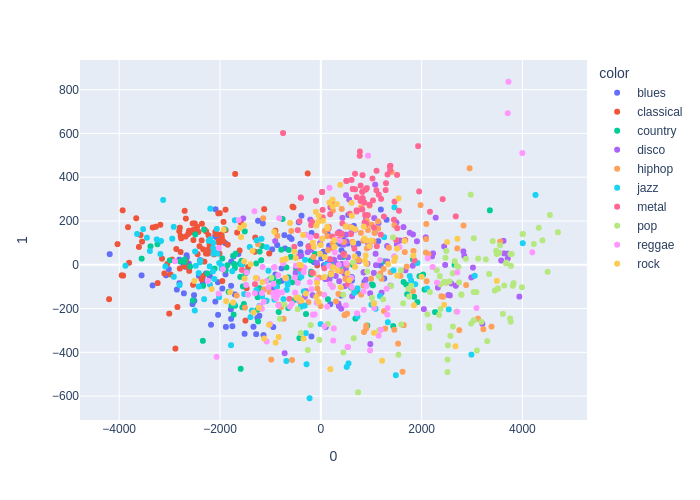

In [15]:
import plotly.express as px
fig = px.scatter(db_pca, x = 0, y = 1, color = finalDf['label'])
fig.show("png")



---


**3D Representation** ⏩


---



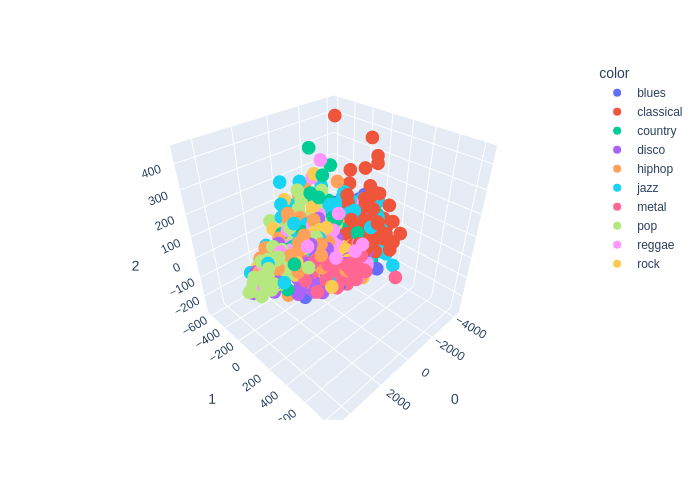

In [14]:
fig = px.scatter_3d(db_pca, x = 0, y = 1, z = 2, color = finalDf['label'])
fig.show("png")



---


**Representasi 2D dengan pemuatan**

*`Sekarang lihat pemuatan untuk lebih memahami bobot variabel asli ke komponen:`*


---



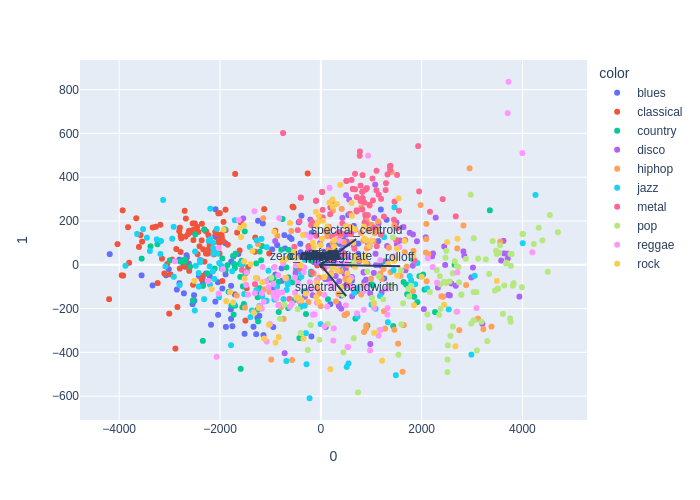

In [13]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
features = db1.columns

fig = px.scatter(db_pca, x=0, y=1, color= finalDf['label'])
 
for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show("png")




*Rolloff, spectral_centroid, bandwidth* tampaknya menjadi yang paling penting. ⛔



